# Convert Parquet to CSV

With enough finagling you can convert any file type you'll find on HF

In [ ]:
%%capture
!pip install pyarrow

from pathlib import Path
import pandas as pd
import pyarrow

datasets = [
    'datasets/vikp-textbook_quality_programming.parquet'
]

for dataset in datasets:
    file_extension = Path(dataset).suffix
    file_folder = Path(dataset).parent
    file_name = Path(dataset).stem

    dataset_dataframe = pd.read_parquet(dataset)
    dataset_dataframe.to_csv(str(file_folder) + '/' + file_name + '.csv', index=False)
    # dataset_dataframe.to_parquet(str(file_folder) + '/' + file_name + '.parquet', index=False)
    # dataset_dataframe.to_json(str(file_folder) + '/' + file_name + '.json')
    
    print(f"Converted {file_name + file_extension}")

# Flatten Datasets

Secret suace: Use GPT-4 if you get stuck

### 🐡 Puffin Format

✅ Tested

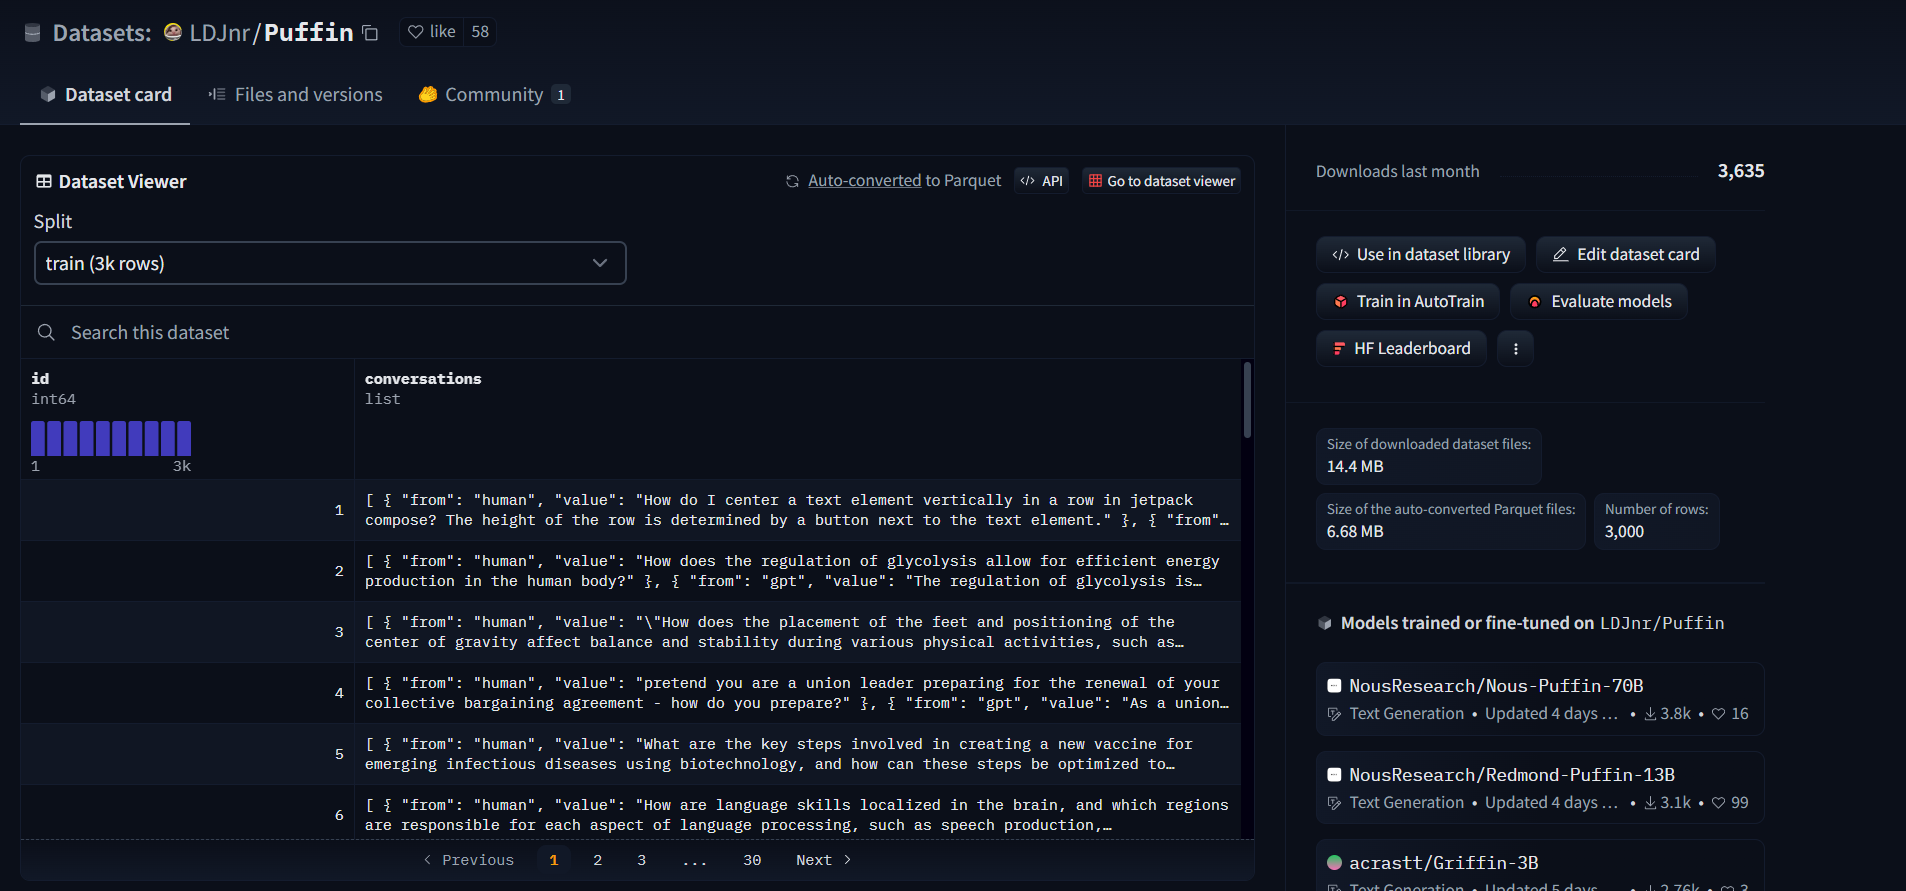

In [ ]:
from datasets import load_dataset

# Paste the "repo/dataset_name" string into "load_dataset"
dataset = load_dataset("LDJnr/Puffin")["train"]
print(dataset)

# Set dataset name and title. Will end up as name_of_file and Graph Titles.
dataset_name = "Puffin".replace("-", "_").lower()
dataset_title = "Puffin"

# Extract conversations to train on and corresponding titles
conversations_raw = dataset["conversations"]

# Convert each turn of a chat conversation into one long string for each row
conversation_strings = []
for conversation in conversations_raw:
    messages = [turn["value"] for turn in conversation]
    conversation_str = " ".join(messages)
    conversation_strings.append(conversation_str)

### 📚 Textbook Quality Format

✅ Tested

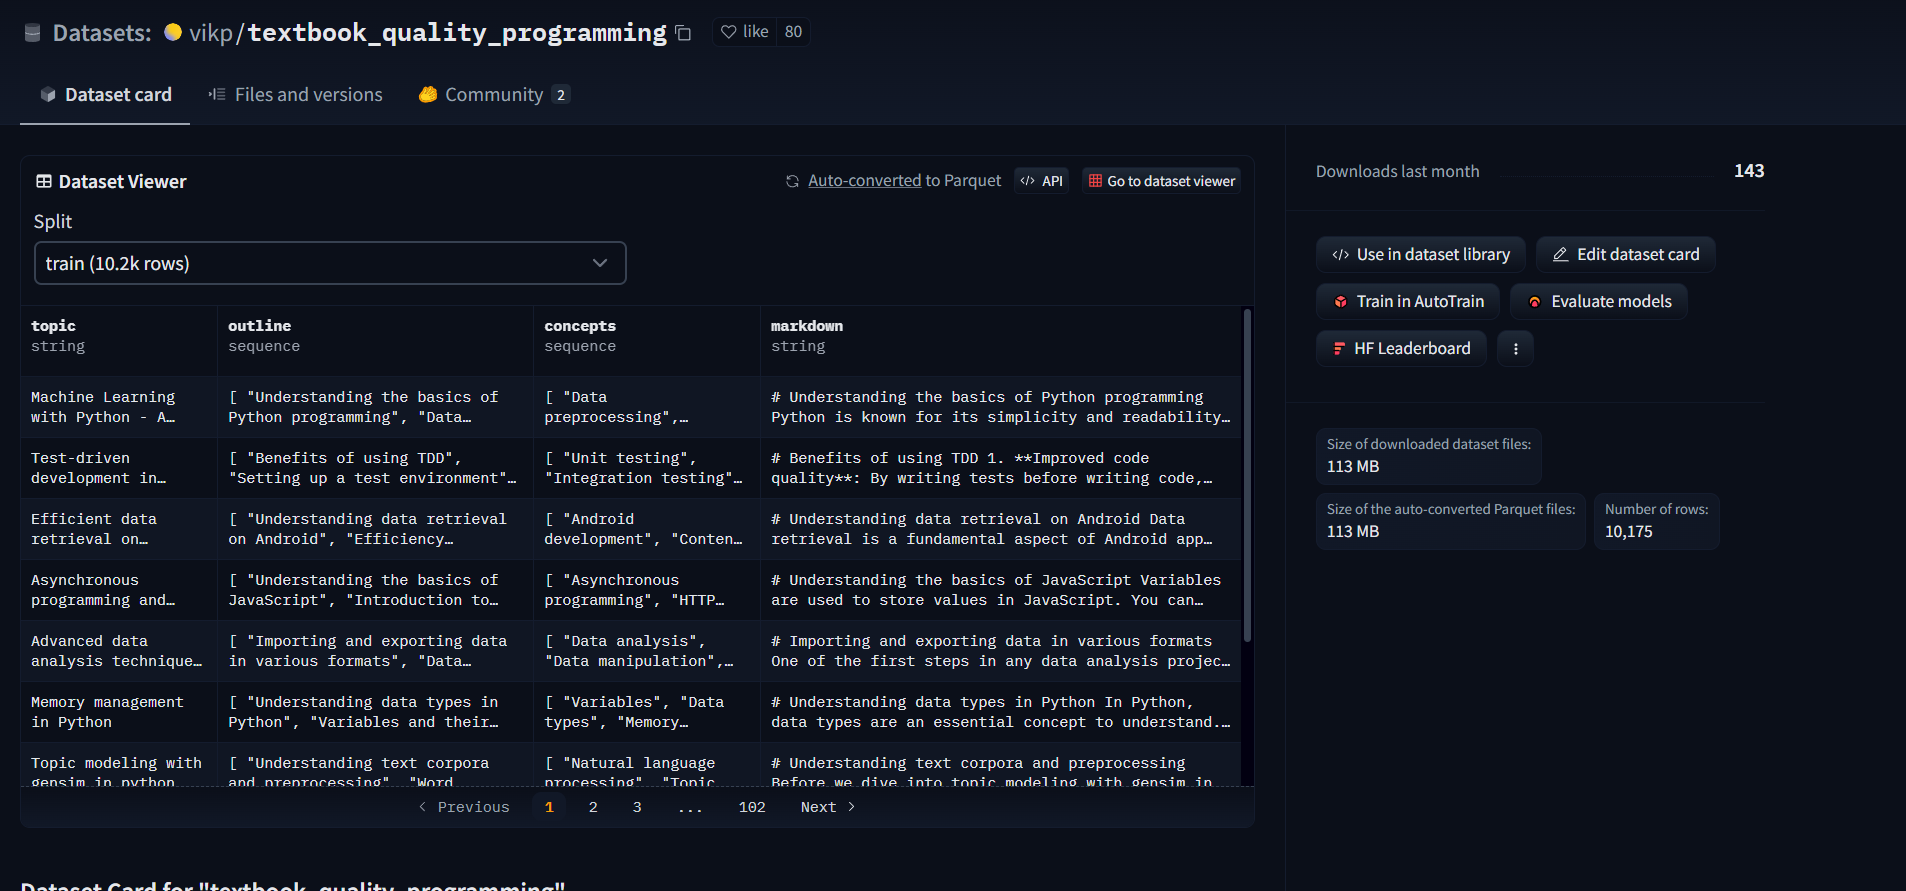

In [ ]:
from datasets import load_dataset
import pandas as pd

# Paste the "repo/dataset_name" string into "load_dataset"
dataset = load_dataset("vikp/textbook_quality_programming")["train"]
print(dataset)

# Set dataset name and title. Will end up as name_of_file and Graph Titles.
dataset_name = "textbook_quality_programming".replace("-", "_").lower()
dataset_title = "Textbook Quality Programming"

# Handle the columns we want to extract topics from
conversations_raw = dataset
df = pd.DataFrame(conversations_raw)

# Convert each turn of a chat conversation into one long string for each row
conversation_strings = []
for _, row in df.iterrows():
    # Flatten the lists in 'outline' and 'concepts' columns to strings
    outline_str = ' '.join(row['outline'])
    concepts_str = ' '.join(row['concepts'])
    
    # Concatenate all columns' values into a single string
    combined_str = f"{row['topic']} {outline_str} {concepts_str} {row['markdown']}"
    
    # Append the combined string to the list
    conversation_strings.append(combined_str)

### 👑 Open Hermes Format

✅ Tested

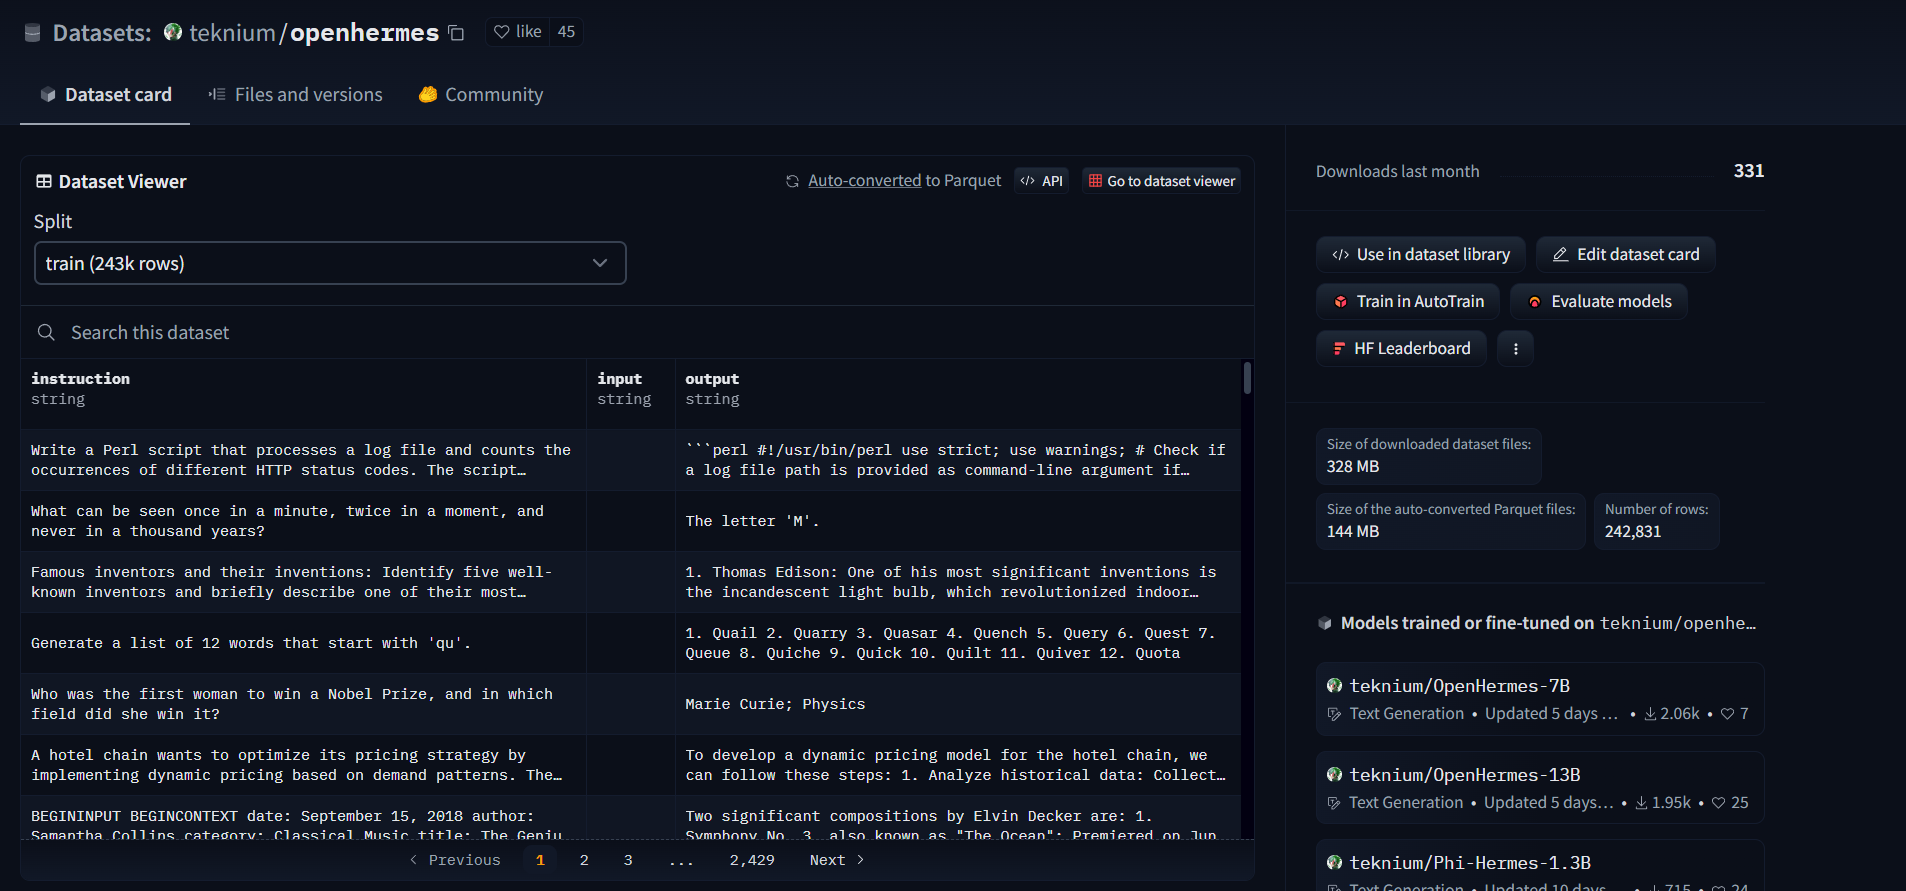

In [ ]:
from datasets import load_dataset

# Paste the "repo/dataset_name" string into "load_dataset"
dataset = load_dataset("teknium/openhermes")["train"]
print(dataset)

# Set dataset name and title. Will end up as name_of_file and Graph Titles.
dataset_name = "OpenHermes".replace("-", "_").lower()
dataset_title = "Open Hermes"

# Create variables for the columns we want to extract topics from
input_data = dataset["input"]
output_data = dataset["output"]
instruction = dataset["instruction"]

# Convert each turn of a chat conversation into one long string for each row
conversation_strings = [' '.join(row) for row in zip(instruction, input_data, output_data)]

### 🐋 Orca Best Format

✅ Tested

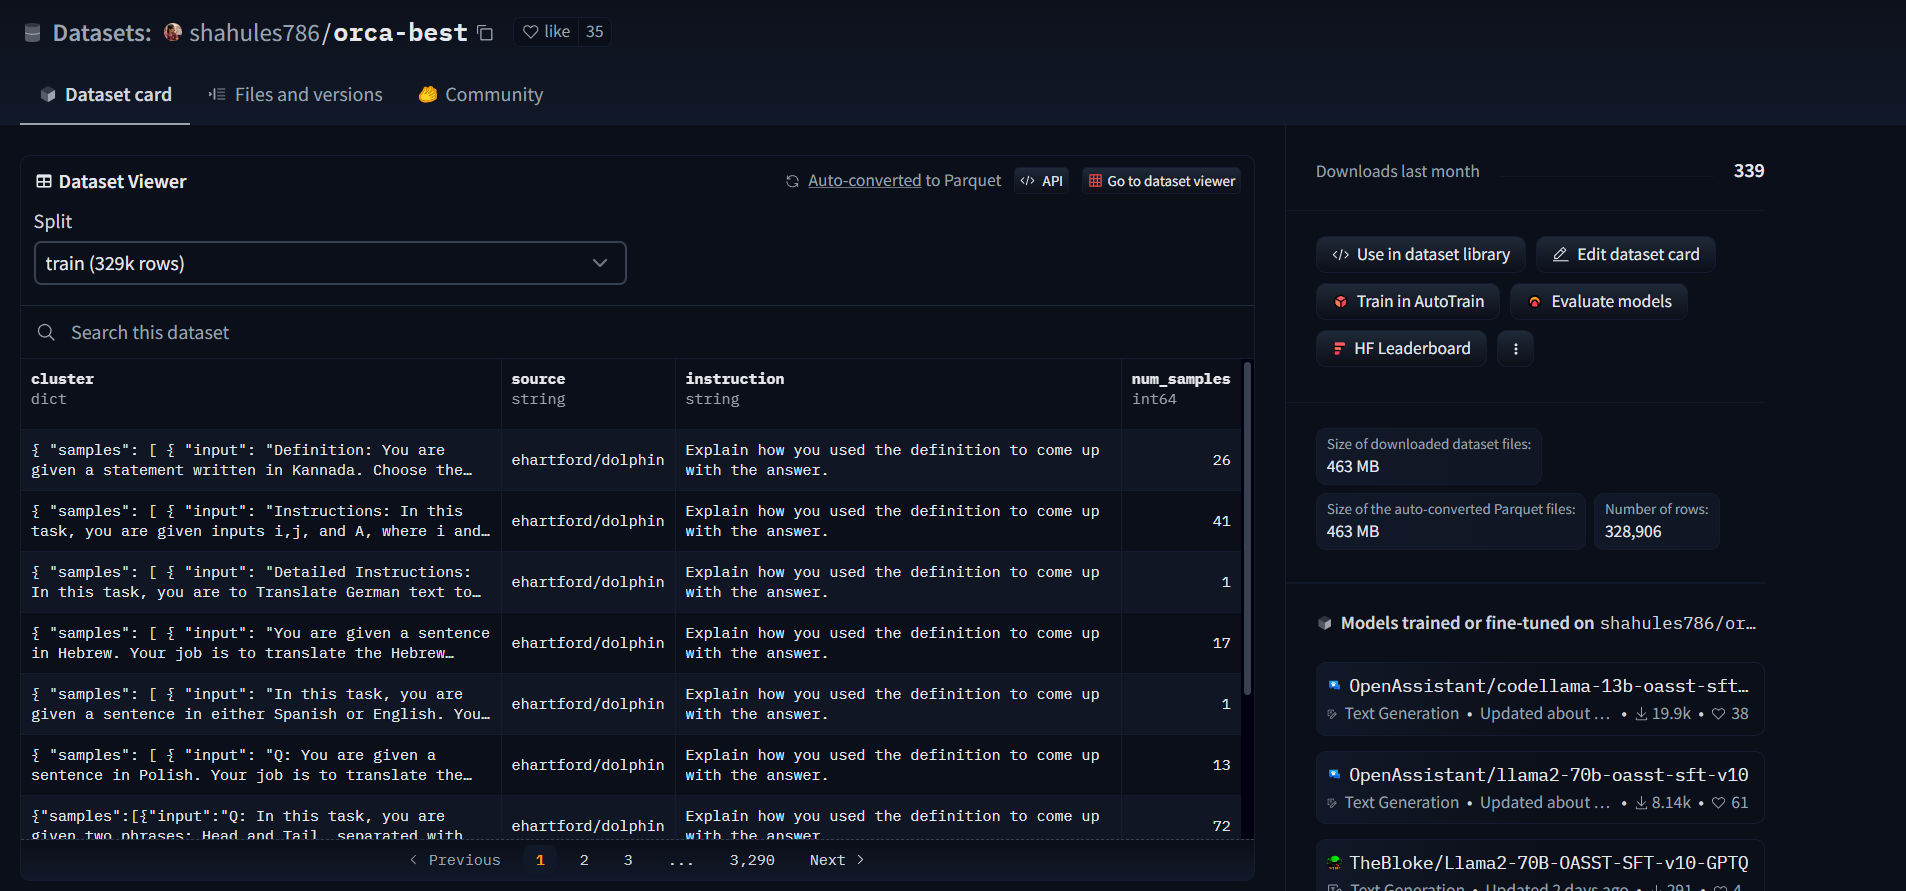

In [ ]:
from datasets import load_dataset

# Paste the "repo/dataset_name" string into "load_dataset"
dataset = load_dataset("shahules786/orca-best")["train"]
print(dataset)

# Set dataset name and title. Will end up as name_of_file and Graph Titles.
dataset_name = "orca-best".replace("-", "_").lower()
dataset_title = "Orca Best"

# Create variables for the columns we want to extract topics from
cluster = dataset["cluster"]

# Convert each turn of a chat conversation into one long string for each row
conversation_strings = [
    ' '.join([sample['input'] + ' ' + sample['output'] for sample in group['samples']])
    for group in cluster
]

### 🦨 Skunkworks MoE Format

❌ Under construction, need to separate experts

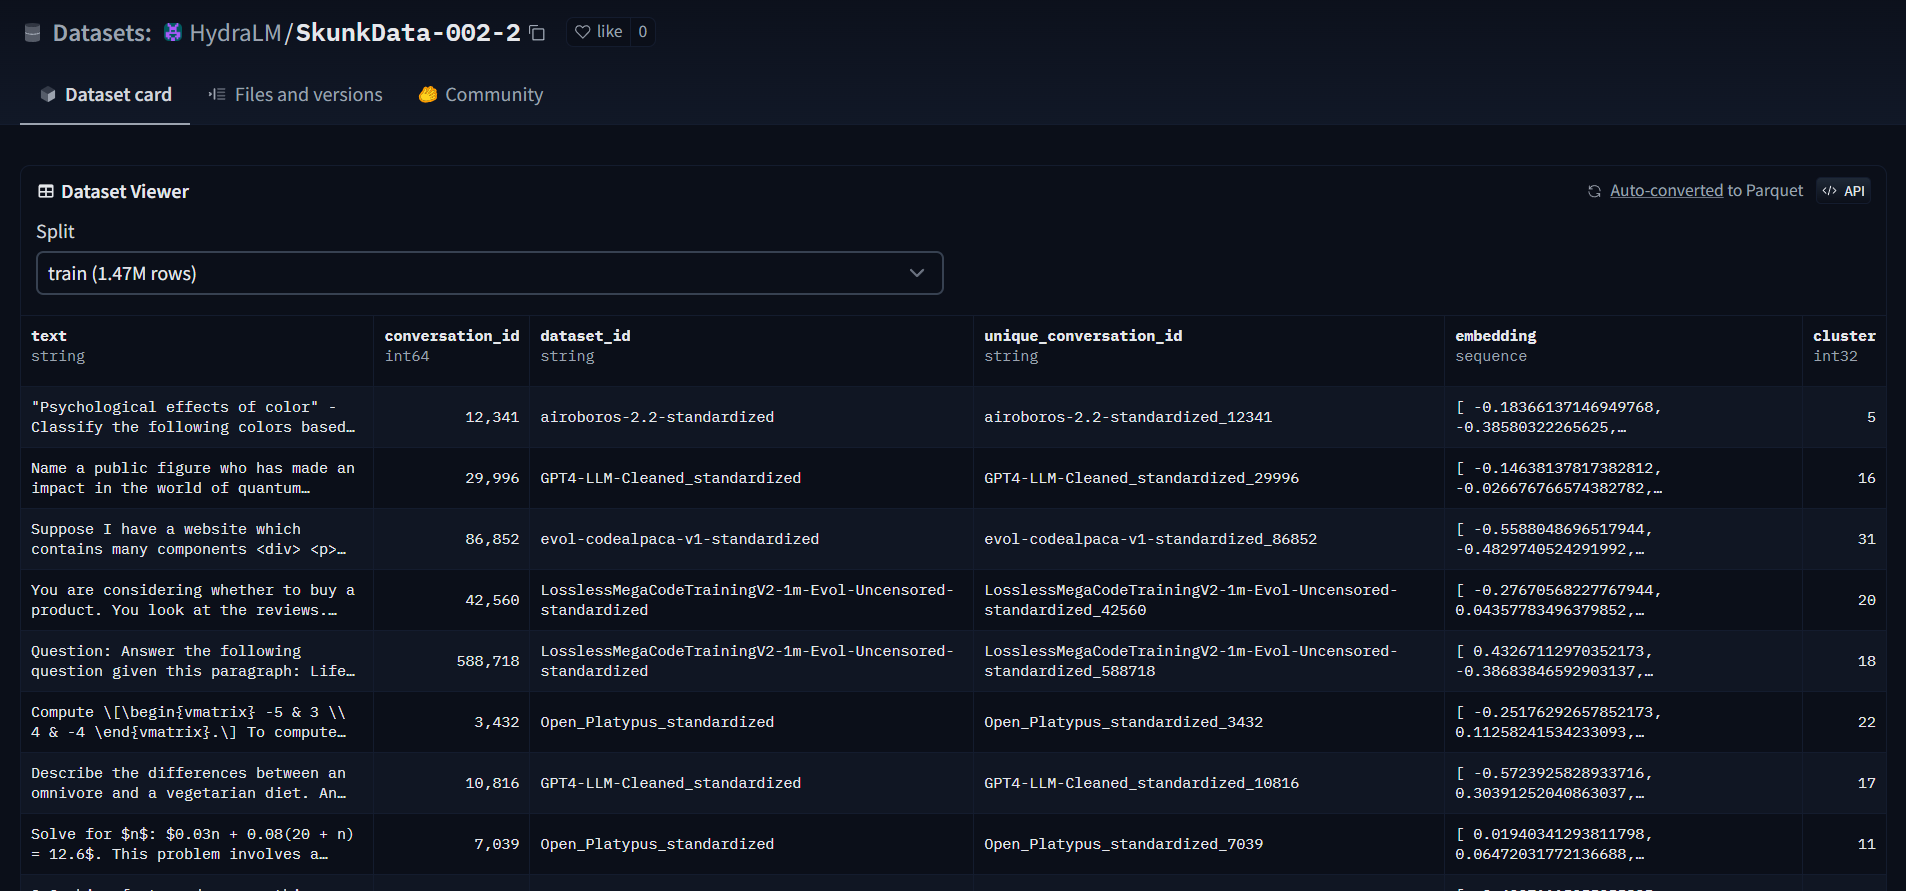

In [ ]:
from datasets import load_dataset

# Paste the "repo/dataset_name" string into "load_dataset"
dataset = load_dataset("HydraLM/SkunkData-002-2")["train"]
print(dataset)

# Set dataset name and title. Will end up as name_of_file and Graph Titles.
dataset_name = "Skunkworks MoE".replace("-", "_").lower()
dataset_title = "Skunkworks MoE"

# Create variables for the columns we want to extract topics from
text = dataset["text"]
conversation_id = dataset["conversation_id"]
unique_conversation_id = dataset["unique_conversation_id"]

# Grouping conversations by ID
conversations_raw = {}
for i, conv_id in enumerate(conversation_id):
    if conv_id not in conversations_raw:
        conversations_raw[conv_id] = []
    conversations_raw[conv_id].append(text[i])

# Convert each turn of a chat conversation into one long string for each row
conversation_strings = []
for value in conversations_raw.values():
    conversation_strings.append(" ".join(value))

### 🧱 Databricks Dolly Format

✅ Tested

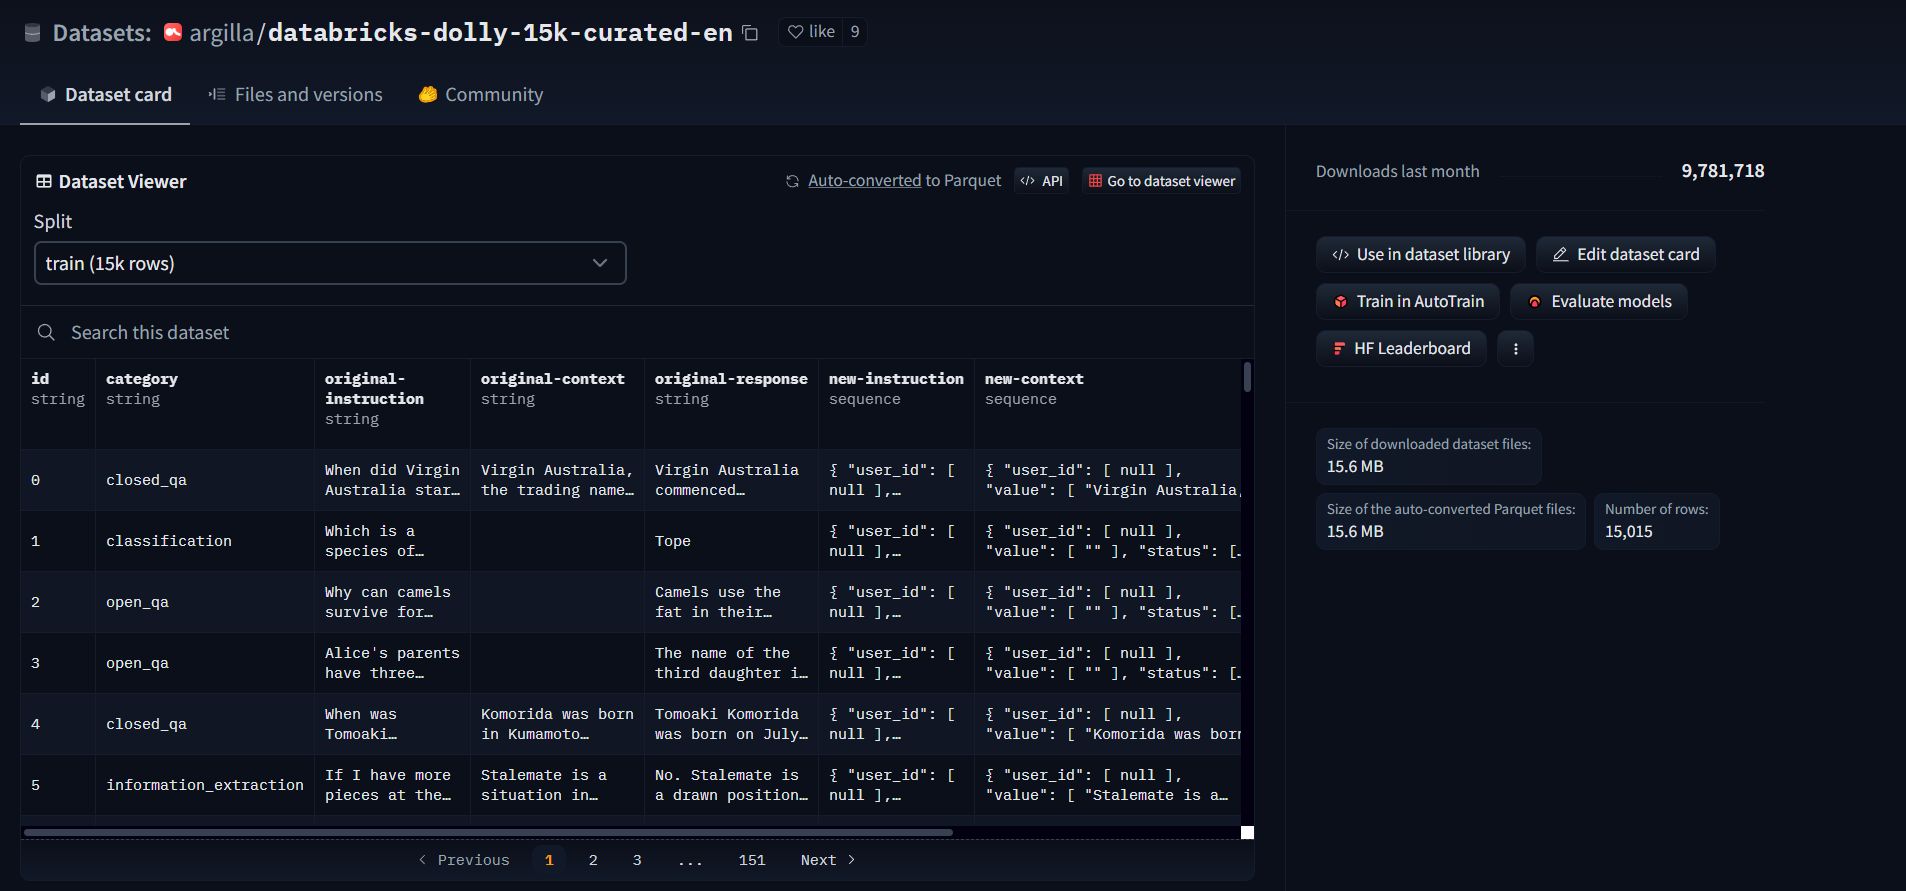

In [ ]:
from datasets import load_dataset
import json

# Paste the "repo/dataset_name" string into "load_dataset"
dataset = load_dataset("argilla/databricks-dolly-15k-curated-en")["train"]
print(dataset)

# Set dataset name and title. Will end up as name_of_file and Graph Titles.
dataset_name = "databricks-dolly-15k-curated".replace("-", "_").lower()
dataset_title = "Databricks Dolly (15k)"

# Create variables for the columns we want to extract topics from
original_instruction = dataset["original-instruction"]
original_context = dataset["original-context"]
original_response = dataset["original-response"]

# Turn the system prompts, inputs, instructions, responses and outputs into full conversations
conversations_raw = list(zip(original_instruction, original_context, original_response))

# Convert each turn of a chat conversation into one long string for each row
conversation_strings = []
for conversation in conversations_raw:
    messages = [turn.strip() for turn in conversation if turn]
    conversation_str = " ".join(messages)
    conversation_strings.append(conversation_str)

# 🏷 Bonus: Dataset Inspection using Bulk 🏷

In [ ]:
from sentence_transformers import SentenceTransformer
from umap import UMAP
import pandas as pd

conv_df = pd.DataFrame({'text': conversations})
model = SentenceTransformer("BAAI/bge-base-en-v1.5")
X = model.encode(conv_df['text'])

umap = UMAP(n_components=2)
X_tfm = umap.fit_transform(X)

df['x'] = X_tfm[:, 0]
df['y'] = X_tfm[:, 1]

df.to_csv(f"datasets/ready_{dataset_name}.csv", index=False)
print("CSV ready for Bulk.")